# Bayesian Data Analysis

This notebook provides a very simple example of Bayesian parameter estimation using the Beta-Binomial model. Both analytical and simulation-based results are presented.

## Approaches to Data Analysis

><i>"All models are wrong, but some are useful"</i> -- George Box

### 1. Exploratory
><p>Descriptive statistics without any probabilistic assumptions
><p>Examples include: Average, Median, Quantiles, Range, Variance, Minimum/Maximum, Histogram, and various other plots and charts

<i>[Note: Quantities in items 2 & 3, below, can be scalars or vectors.]</i>

### 2. Frequentist
><p>The basic frequentist probability model consists of a random variable or vector (RV), $X$, with a cumulative distribution, $F$, and fixed, deterministic parameters, $\theta_1, ..., \theta_m$.</p>
><p>$$X \sim F(x;\theta_1, ..., \theta_m)$$</p>
><p>For example, the standard normal model is $F(x; \mu, \sigma) = \Phi(\frac{x-\mu}{\sigma})$,</p>
><p>where $\frac{d}{dz}\Phi(z) = \phi(z) = \frac{1}{\sqrt {2\pi}} e^{-z^2/2}$

### 3. Bayesian
><p>The basic Bayesian probability model is similar to the Frequentist model except that it goes a step further and assumes that the parameters, themselves, are RVs with their own cumulative distribution functions and parameters (e.g., $G$ and $\gamma$, resp. below).</p>
><p>For example,</p>
><p>$(X \mid \Theta=\theta) \sim F(x;\theta)$, called the <b>Likelihood Distribution</b></p>
><p>$\Theta \sim G(\theta;\gamma)$, called the <b>Prior Distribution</b></p>
><p>$\gamma$ is called a <b>hyperparameter</b> and is usually deterministic</p>
><p>The next section provides an example.

To make inferences about a model, Frequentist or Bayesian, it is necessary to estimate the parameter(s), $\theta$, of the model.

In the Frequentist case, the Maximum Likelihood Estimate (MLE) is typically derived. The MLE is a deterministic value.

In the Bayesian case, we seek the conditional probability distribution or density of the parameter, given the observed data: $P(\Theta \mid X=x)$. It's called the <b>Posterior Distribution</b>.

Depending on the type of likelihood and prior, the derivation of the posterior might be intractable, so simulation is used to approximate it.  A simple example of such a simulation follows.

## Beta-Binomial Example

This is probably one of the most often sited examples of Bayesian parameter estimation. The posterior distribution can be computed analytically.  Also, the prior and posterior are from the same family of distributions, [Beta](https://en.wikipedia.org/wiki/Beta_distribution), and so the prior distribution is called a <b>Conjugate Distribution for the likelihood</b>.

### The Data

Assume that we've conducted an experiment consisting of $n$ [binomial trials](https://en.wikipedia.org/wiki/Binomial_distribution) with an unknown probability of success, $\theta$, and that we've observed $k_{obs}$ successes:

In [1]:
n = 20  # Number of trials
k_obs = 6  # Number of observed successes in n trials

### The Frequentist Binomial Model

Here, the parameter, $\theta$, is an unknown deterministic value.

$$K \sim Binomial_n(k;\theta) \equiv \binom{n}{k} \theta^k(1-\theta)^{n-k}$$

In [2]:
print(f"The Frequentists' MLE estimate of theta is k_obs/n = {k_obs}/{n} = {k_obs/n}")

The Frequentists' MLE estimate of theta is k_obs/n = 6/20 = 0.3


### The Bayesian Beta-Binomial Model

#### Likelihood:
>Probabilistic model of the data
><p>$$(K \mid \Theta=\theta) \sim Binomial_n(k;\theta) \equiv \binom{n}{k} \theta^k(1-\theta)^{n-k}$$</p>

#### Prior:
>Probabilistic model of the parameter
><p>$$\Theta \sim Beta(\theta; \alpha, \beta) \equiv \frac{\Gamma(\alpha)\Gamma(\beta)}{\Gamma(\alpha + \beta)} \theta^{\alpha - 1} (1-\theta)^{\beta - 1}$$</p>
><p>For this example, assume $\Theta \sim Beta(1, 1)$, which is equivalent to the uniform distribution:
><p>$$Beta(1,1) \equiv U(0,1)$$</p>

In [3]:
# Beta prior distribution parameters used for this example
pre_alpha = 1
pre_beta = 1

#### Posterior
>The Beta-Binomial posterior can be derived analytically using Bayes Theorem:
><p><center><b>Posterior $\propto$ Likelihood $\times$ Prior</b></center></p>
><p>Noting the similarity between the Binomial and Beta distributions, we can perform algebraic manipulations to arrive at the following result:</p>
><p><center>$(\Theta \mid K=k) \sim Beta(\theta; \alpha+k, \beta+n-k)$</center></p>

In [4]:
post_alpha = pre_alpha + k_obs
post_beta = pre_beta + n - k_obs
posterior_beta_parameters = (post_alpha, post_beta)
show_calc = f" = Beta({pre_alpha} + {k_obs}, {pre_beta} + {n} - {k_obs})"
print(f"So, the posterior distribution is Beta{posterior_beta_parameters}" + show_calc)

So, the posterior distribution is Beta(7, 15) = Beta(1 + 6, 1 + 20 - 6)


#### Plot of the Posterior Density

Since the prior distribution here is a $Beta(1,1)$, which is equivalent to a <i>Uniform(0,1)</i> distribution, we'll skip plotting it and jump right into plotting the posterior distribution.  Remember, this is the exact, analytically-derived posterior distribution for this example.  We'll also include a confidence interval.

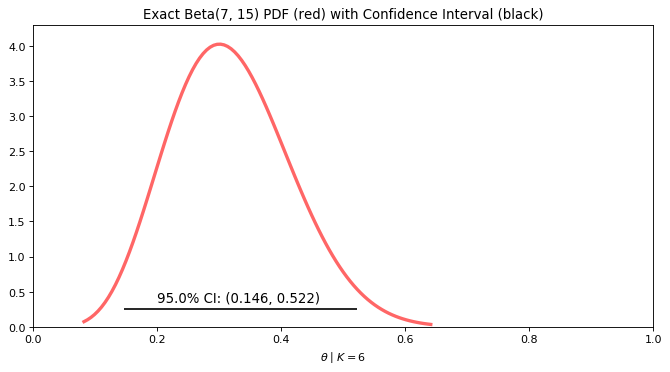

In [5]:
from scipy.stats import uniform, binom, beta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Exact Confidence Interval
conf_int_size = 0.95
p1 = (1 - conf_int_size)/2
ci_low, ci_high = beta.ppf([p1, 1-p1], *posterior_beta_parameters)
ci_label = f"{100 * conf_int_size:0.1f}% CI: ({ci_low:0.3f}, {ci_high:0.3f})"

x = np.linspace(beta.ppf(0.001, *posterior_beta_parameters),
                beta.ppf(0.999, *posterior_beta_parameters), 100)
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel(r"$\theta \mid K = $" + f"{k_obs}")
plt.title(f"Exact Beta{posterior_beta_parameters} PDF (red) with Confidence Interval (black)")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 4.3)
plt.hlines(0.25, ci_low, ci_high, colors='k', linestyles='solid')
plt.text(0.2, 0.35, ci_label, color='k', fontsize='large')
_ = plt.plot(x, beta.pdf(x, *posterior_beta_parameters), 'r-', lw=3, alpha=0.6)

In the next section, we'll use a very simple simulation approach to derive the beta-binomial posterior distribution.

### A Simple Simulation-Based Derivation of the Posterior

> <i>"We could call Bayesian data analysis 'statistics using conditional probability', but that wouldn’t put the butts in the seats."</i>  
> <p>-- Andrew Gelman</p>

This section illustrates how the beta-binomial posterior density can be derived, instead, by simulation.

The approach here is <b>very simple</b> for pedagogical purposes - MCMC is <b>not</b> used.

To do this, we'll work with two lists of $\theta$'s:

* <b><i>priors</i></b>: a list of $m$ independent <i>Uniform(0,1)</i> random numbers

* <b><i>posteriors</i></b>: the subset of priors that, when used in a $Binomial_n(k;\theta)$ trial, result in $k_{obs}$ successes

In [6]:
m = 500_000  # Number of priors

priors = uniform.rvs(size=m)
%time posteriors = [theta for theta in priors if binom.rvs(n, theta)==k_obs]

print(f"\nThere were {len(posteriors)} matches out of {m} priors. (Only {100*len(posteriors)/m:0.2}% matched)")

CPU times: user 17.9 s, sys: 400 ms, total: 18.3 s
Wall time: 17.5 s

There were 23838 matches out of 500000 priors. (Only 4.8% matched)


Below, is a scaled histogram of the values in the posteriors list, overlayed with the exact beta PDF that was determined above.  An approximate <b>Credible Interval</b> is also displayed, along with an approximate <b>Maximum A Posterior (MAP)</b> estimate of the parameter, $\theta$.

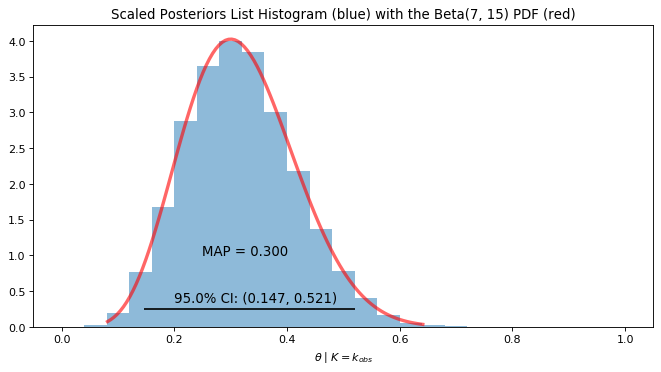

In [7]:
# Approximate Confidence Interval
from scipy.stats.mstats import mquantiles
simp_ci_low, simp_ci_high = mquantiles(posteriors, prob=[p1, 1-p1])
simp_ci_label = f"{100 * conf_int_size:0.1f}% CI: ({simp_ci_low:0.3f}, {simp_ci_high:0.3f})"

hbins = 25
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel(r"$\theta \mid K = k_{obs}$")
plt.title(f"Scaled Posteriors List Histogram (blue) with the Beta{posterior_beta_parameters} PDF (red)")
plt.plot(x, beta.pdf(x, *posterior_beta_parameters), 'r-', lw=3, alpha=0.6)
plt.hlines(0.25, simp_ci_low, simp_ci_high, colors='k', linestyles='solid')
plt.text(0.2, 0.35, simp_ci_label, color='k', fontsize='large')
ys, xs, _ = plt.hist(posteriors, bins=hbins, density=True, range=[0.0, 1.0], alpha=0.5)

bin_index = np.argmax(ys)
mode = (xs[bin_index] + xs[bin_index + 1])/2
map_label = f"MAP = {mode:0.3f}"
_ = plt.text(mode - 0.05, 1.0, map_label, color='k', fontsize='large')

### MCMC-Based Derivation of the Posterior

The type of simple simulation used above is not practical for most situations.  Fortunately, there is an efficient family of simulation algorithms known as Markov Chain Monte Carlo (MCMC) methods; and there are <i>probabilistic programming</i> libraries for applying MCMC methods (e.g., PyMC3).

Here's how PyMC3 can be used to solve the problem presented above.

In [8]:
import pymc3 as pm
import warnings
warnings.simplefilter('ignore')

#### Create the Model

In [9]:
model = pm.Model()

with model:
    theta = pm.Beta("theta", alpha=pre_alpha, beta=pre_beta )
    k = pm.Binomial("k", p=theta, n=n, observed=k_obs)

model

#### Run the Model

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 42000/42000 [00:06<00:00, 6914.97draws/s]
The acceptance probability does not match the target. It is 0.8801544240936986, but should be close to 0.8. Try to increase the number of tuning steps.


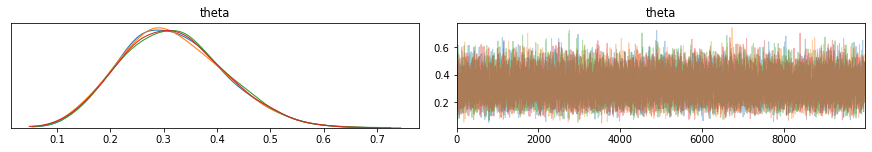

In [10]:
num_samples = 10_000

with model:
    #tr = pm.sample(num_samples, step=pm.Metropolis(), progressbar=True )
    tr = pm.sample(num_samples, progressbar=True )

_ = pm.traceplot(tr)

#### MAP Estimate

The maximum a posteriori (MAP) estimate is for Bayesians what the MLE is for Frequentists.

In [11]:
map_estimate = pm.find_MAP(model=model)
map_estimate['theta']

logp = -3.2978, ||grad|| = 4: 100%|██████████| 6/6 [00:00<00:00, 2801.18it/s]


array(0.29999954)

#### Credible Interval

The <i>credible interval</i> is for Bayesians what the confidence interval is for Frequentists.

The dark horizontal bar in the plot, below, is the highest posterior density (HPD), which is the minimum width credible interval for a specific requested size.

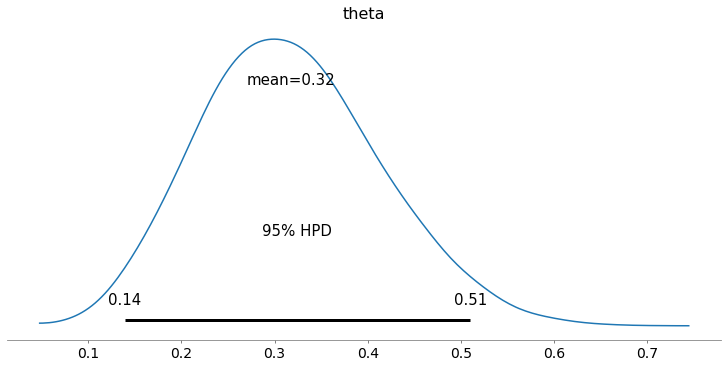

In [12]:
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,5), constrained_layout=True)
_ = pm.plot_posterior(tr, credible_interval=conf_int_size, ax=axes)

We can compare the HPD, above, with the HPD for the posteriors list calculated using the simple, none-MCMC simulation from the previous section, above:

In [13]:
list(pm.stats.hpd(np.array(posteriors)))

[0.13264005876939233, 0.503676050991464]

#### Plot the MCMC Simulated Data

In [14]:
len(tr['theta'])

40000

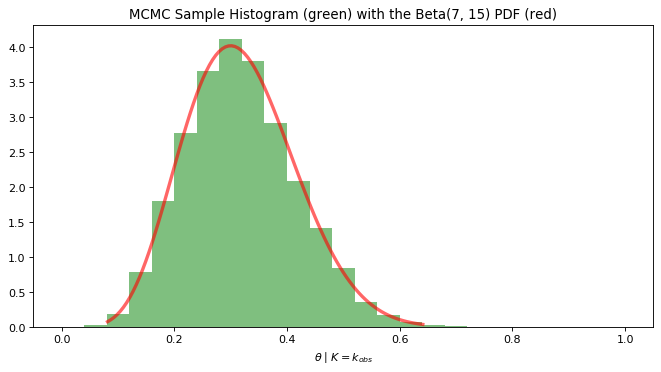

In [15]:
theta_samples = tr['theta', 8000:]

fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.xlabel(r"$\theta \mid K = k_{obs}$")
plt.title(f"MCMC Sample Histogram (green) with the Beta{posterior_beta_parameters} PDF (red)")
plt.plot(x, beta.pdf(x, *posterior_beta_parameters), 'r-', lw=3, alpha=0.6)
_, _, _ = plt.hist(theta_samples, hbins, density=True, range=[0.0, 1.0], alpha=0.5, color='g')

## End of Example

In [16]:
from IPython.core.display import HTML

def css_styling():
    styles = open("styles/custom.css", "r").read()
    return HTML(styles)
css_styling()